In [1]:
import numpy as np
import networkx as nx
import matplotlib
from scipy.stats import multivariate_normal
%matplotlib inline

## Let us try out networkx on an example tree

We will use this general tree for all the incoming computations. Especially, the tree is defined by the following variables
\begin{align}
(x_1, x_2, x_3, x_4, x_5, x_6, x_7, y_1, y_2, z_1) = (v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9)
\end{align}
$x$ designates the leaves (observed or last layer of hidden variables). These variables will be connected later to an observation model. $y$ and $z$ denote the first order and second order of internal nodes. $v_9 = z_1$ is the root node (associated to the prior of the Gaussian random walk).

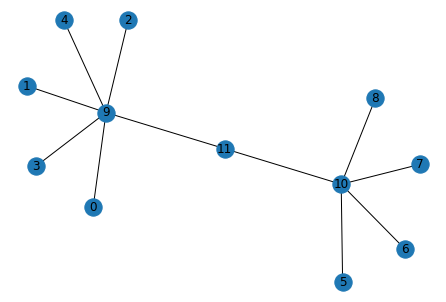

In [97]:
# let us encode the adjacency matrix 
# A_{ij} = 0 if no edge between i and j
# A_{ij} > 0 means there is an edge and denotes the duration from the parent to the child
# A_{ij} < 0 is not allowed

A0 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

T0 = nx.from_numpy_array(A0)
nx.draw(T0, with_labels=True)

In [98]:
for n in T0.nodes(data=True):
    print(n)

(0, {})
(1, {})
(2, {})
(3, {})
(4, {})
(5, {})
(6, {})
(7, {})
(8, {})
(9, {})
(10, {})
(11, {})


In [99]:
#parents = {1:10, 2:10, 3:10, 4:10, 5:10, 6:11, 7:11, 8:11, 9:11, 10:11, 10:12, 11:12}
#parents = {1:20, 2:20, 3:20, 4:20, 5:20, 6:20, 7:19, 8:19, 9:18, 10:18, 11:18, 12:18, 13:17, 14:16,
          #15:16, 16:21, 17:21, 18:21, 19:21, 20:21}
#parents = {1:3, 2:3, 3:4, 4:5}
#parents = {1:4, 2:4, 3:5, 4:6, 5:6, 6:7} #, 6:8, 7:8}
#parents = {1:7, 2:5, 3:6, 4:8, 5:6, 6:8, 7:8} #, 6:8, 7:8}
#parents = {1:8, 2:7, 3:6, 4:5, 5:6, 6:8, 7:8}
#parents = {2: 1, 3: 1, 5: 1, 4: 3, 6: 5, 7: 5, 8: 7}
#parents = {1:15, 2:12, 3:9, 4:11, 5:10, 6:8, 7:13, 8:10, 9:12, 10:13, 11:12, 12:14, 13:16, 14:16, 15:16 }
#parents = {2: 1, 3: 1, 5: 1, 9: 1, 4: 3, 6: 5, 7: 5, 8: 7, 10: 9, 11: 9, 12: 9, 13: 11, 14: 12, 15: 12, 16: 15}
#parents = {2: 1, 3: 1, 5: 1, 9: 1, 17: 1, 4: 3, 6: 5,
#7: 5,8: 7,10: 9,11: 9,12: 9,13: 11,14: 12,15: 12,16: 15,18: 17,19: 17,20: 17,21: 17,22: 19, 23: 20,24: 20,26: 21,27: 21,28: 21,25: 24,29: 27,30: 28,31: 28,32: 31}
parents = {2: 1,
          3: 1,
          5: 1,
          9: 1,
          4: 3,
          6: 5,
          7: 5,
          8: 7,
          10: 9,
          11: 9,
          12: 9,
          13: 11,
          14: 12,
          15: 12,
          16: 15}

In [100]:
L = list(parents.keys())
n_nodes = len(L) + 1
L

[2, 3, 5, 9, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]

In [101]:
def adjacency_matrix(n_nodes, parents):
    A = np.zeros((n_nodes, n_nodes))
    for k in list(parents.keys()):
        pi = parents[k]
        #print(k, pi)
        A[k - 1, pi - 1] = 1
        A[pi - 1, k - 1] = 1
    return A

A = adjacency_matrix(n_nodes, parents)
T = nx.from_numpy_array(A)
leaves = [n for n in [node for node in T.nodes() if T.degree(node)==1] if n != 0]
n_leaves = len(leaves)
n_leaves

8

In [126]:
n_leaves, leaves

(8, [1, 3, 5, 7, 9, 12, 13, 15])

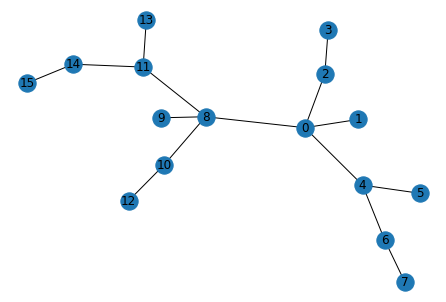

In [103]:
nx.draw(T, with_labels=True)

In order to collect the prior information while computing the posterior predictive density, we need to add a virtual node with the prior information as follow

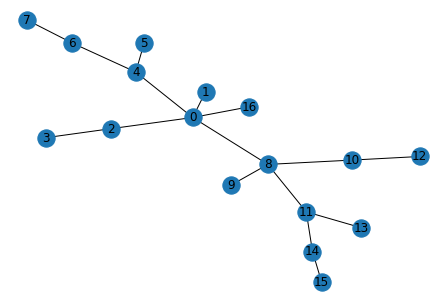

In [104]:
# add a fake node to simulate the prior
T_add = nx.Graph(T)
T_add.add_node(n_nodes)
#T_add.add_edge(n_nodes - 1, n_nodes, weight=1.0)
T_add.add_edge(0, n_nodes, weight=1.0)
nx.draw(T_add, with_labels=True)

## 1. Exact computations via matrix inversion

For this, we need to compute the mean and covariance of the marginals. The mean will always be zero. We are therefore left with computing the covariances. For this, let us start by forming the precision matrix of the whole distribution

\begin{align}
\log p(x_1, x_2, x_3, x_4, y_1, x_6, x_7, x_8, y_2, z_1) = \sum_{nodes} \log p(node \mid parent) \\
 = \sum_{nodes} - \frac{|| x - \pi(x)||^2}{2 \delta_{x, \pi(x)}^2} \\
  = \sum_{nodes} -\frac{1}{2} \left[ \frac{x^2}{\delta_{x, \pi(x)}^2} + \frac{\pi(x)^2}{\delta_{x, \pi(x)}^2} - 2\frac{x\pi(x)}{\delta_{x, \pi(x)}^2} \right] \\
  = \sum_{ij} -\frac{1}{2} \Sigma^{-1}_{ij} x_i x_j
\end{align}

From this we can identify the coefficients in linear time

(z1) = (x10)

(y1, y2) = (x9, x8)

(x1, x2, x3, x4, x_5, x_6, x_7)

In [106]:
d = 2
inverse_covariance = np.zeros((n_nodes * d, n_nodes * d))
for i in parents:
    i = i - 1
    pi_ind = parents[i + 1] - 1
    print(i, pi_ind)
    inverse_covariance[i * d: (i + 1) * d, i * d: (i + 1) * d] += np.identity(d)
    inverse_covariance[pi_ind * d: (pi_ind + 1) * d, pi_ind * d: (pi_ind + 1) * d] += np.identity(d)
    inverse_covariance[pi_ind * d: (pi_ind + 1) * d, i * d: (i + 1) * d] += - np.identity(d)
    inverse_covariance[i * d: (i + 1) * d, pi_ind * d: (pi_ind + 1) * d] += - np.identity(d)
#inverse_covariance[(n_nodes - 1) * d: ((n_nodes - 1) + 1) * d, (n_nodes - 1) * d: ((n_nodes - 1) + 1) * d] += np.identity(d)
inverse_covariance[0:d, 0:d] += np.identity(d)
full_covariance = np.linalg.inv(inverse_covariance)

1 0
2 0
4 0
8 0
3 2
5 4
6 4
7 6
9 8
10 8
11 8
12 10
13 11
14 11
15 14


In [107]:
print("Inverse covariance")
print(inverse_covariance)
print("Full covariance")
print(full_covariance)

inverse_covariance.shape, full_covariance.shape

Inverse covariance
[[ 5.  0. -1. ...  0.  0.  0.]
 [ 0.  5.  0. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  0. -1.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]]
Full covariance
[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 2. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 4. 0. 4.]
 [1. 0. 1. ... 0. 5. 0.]
 [0. 1. 0. ... 4. 0. 5.]]


((32, 32), (32, 32))

## 2. Exact computations via message passing

Initialize the network with messages

In [292]:
import copy

def initialize_messages(G, d, evidence, prior_node):
    ev = copy.deepcopy(evidence)
    dic_nu = {}
    dic_mu = {}
    dic_log_z = {}
    for i, x in enumerate(ev):
        dic_nu[i] = 0.0
        dic_log_z[i] = 0.0
        dic_mu[i] = x
    dic_nu[prior_node] = 0.0
    dic_mu[prior_node] = np.zeros(d)
    dic_log_z[prior_node] = 0.0
    nx.set_node_attributes(G, dic_nu, 'nu')
    nx.set_node_attributes(G, dic_mu, 'mu')
    nx.set_node_attributes(G, dic_log_z, 'log_z')

In [293]:
def initialize_visit(G, prior_node):
    dic_visited = {}
    for node in G:
        dic_visited[node] = False
    nx.set_node_attributes(G, dic_visited, 'visited')

In [294]:
def product_without(L, exclude):
    """
    L: list of elements
    exclude: list of the elements indices to exlucde
    
    returns: product of all desired array elements
    """
    prod = 1
    for idx, x in enumerate(L):
        if idx in exclude:
            continue
        else:
            prod *= x
    return prod   

In [302]:
import pdb

def perform_message_passing(T, root_node, prior_node, include_prior):
    # print(root_node)
    # flag the node as visited
    T.nodes[root_node]["visited"] = True
            
    incoming_messages = []
    # get list of neighbors that are not visited yet
    for node in T.neighbors(root_node):
        if not T.nodes[node]["visited"] and (node != prior_node  or (node == prior_node and include_prior) ):
            #pdb.set_trace()
            perform_message_passing(T, node, prior_node, include_prior)
            incoming_messages.append(node)
    
    #pdb.set_trace()
    
    # collect and return 
    if len(incoming_messages) == 0:
        # nothing to do. This happens on the leaves
        return None
    
    elif len(incoming_messages) == 1:
        # this happens when passing through the root
        k = incoming_messages[0]
        T.nodes[root_node]["nu"] = T.nodes[k]["nu"] + T[root_node][k]["weight"]
        T.nodes[root_node]["mu"] += T.nodes[k]["mu"]
        #if root_node != tree_root:
        T.nodes[root_node]["log_z"] = 0.0
        #else: 
        #    lambda_ = T.nodes[root_node]["nu"]
        #    T.nodes[root_node]["log_z"] = -0.5 * np.sum(( T.nodes[root_node]["mu"]) ** 2) / lambda_
        #    T.nodes[root_node]["log_z"] -= d * 0.5 * np.log(2 * np.pi * lambda_)                                         
        #pdb.set_trace()
            
    elif len(incoming_messages) >= 2:
        # children node i = incoming_messages[i]
        # n: number of children
        n = len(incoming_messages)
        
        #we will keep track of mean and variances of the children nodes in 2 lists
        children_nu = [0.0]*n
        children_mu = [0.0]*n
        
        #updates: mean and variance
        
        #lambda: used later for the normalizing constant
        for i in range(n):
            k = incoming_messages[i]
            children_nu[i] = T.nodes[k]["nu"] + T[root_node][k]["weight"]
            T.nodes[root_node]["nu"] += 1. / children_nu[i]
            children_mu[i] = T.nodes[k]["mu"] / children_nu[i]
            T.nodes[root_node]["mu"] += children_mu[i]
            
            
        T.nodes[root_node]["nu"] = 1. / T.nodes[root_node]["nu"]
        T.nodes[root_node]["mu"] *= T.nodes[root_node]["nu"]
        
        #find t
        t = 0
        for excluded_idx in range(n):
            prod = product_without(children_nu, [excluded_idx])
            t += prod
            
        #normalizing constant
            Z_1 = -0.5 * (n - 1) * d * np.log(2 * np.pi)
            Z_2 = -0.5 * d * np.log(t)
            Z_3 = 0
        
        #nested for loop
        for j in range(n):
            for h in range(n):
                if h == j:
                    continue
                else:
                    prod_2 = product_without(children_nu, [j, h])
            k = incoming_messages[h]
            l = incoming_messages[j]
            Z_3 += prod_2 * np.sum((T.nodes[k]["mu"] - T.nodes[l]["mu"]) ** 2)
        Z_3 *= -0.5 / t
        
        T.nodes[root_node]["log_z"] = Z_1 + Z_2 + Z_3
        
        

In [303]:
def aggregate_messages_into_leaves_likelihood(T, root, add_prior):
    res = 0
    
    # agg Z messages
    for node in T.nodes():
        res += T.nodes[node]["log_z"]
        
    if add_prior:
        # add prior
        nu_inc = 1 + T.nodes[root]["nu"]
        res += - 0.5 * np.sum(T.nodes[root]["mu"] ** 2) / nu_inc - d * 0.5 * np.log(2 * np.pi * nu_inc)
    
    return res

### 2.a case for leaves marginals (for VI bound)

the task here is to compute  $\log p(𝑥1,𝑥2,𝑥3,𝑥4,x5,x6,x7)$ . This can be done quickly via marginalization of the Gaussian vector

In [305]:
import random

ev = [np.array([1.0] * d)] * n_leaves
evidence2 = ev + [np.array([0.0]*d) for i in range(n_nodes - n_leaves)]
evidence_leaves2 = np.hstack(ev)

#####
evidence1 = [None] * n_nodes
evidence_leaves1 = []
for i in range(n_nodes):
    if i in leaves:
        rand = np.random.rand()
        evidence1[i] =  np.array([rand] * d)
        evidence_leaves1.append([rand] * d)
    else:
        evidence1[i] =  np.array([0.0] * d)
        
#evidence_leaves1 = np.hstack([np.array([1.0] * d)] * n_leaves)
#evidence_leaves1 = np.array(evidence_leaves1).flatten()

# Test
evidence1 = np.array([[0., 0.],
                    [0.39631839, 0.39631839],
                    [0., 0.],
                    [0.88514786, 0.88514786],
                    [0., 0.],
                    [0.02791887, 0.02791887],
                    [0., 0.],
                    [0.19234958, 0.19234958],
                    [0., 0.],
                    [0.36469069, 0.36469069],
                    [0., 0.],
                    [0., 0.],
                    [0.05106667, 0.05106667],
                    [0.05682752, 0.05682752],
                    [0., 0.],
                    [0.6672685, 0.6672685]]
                   )
    
evidence_leaves1 = np.array([0.39631839, 0.39631839, 0.88514786, 0.88514786, 0.02791887,
       0.02791887, 0.19234958, 0.19234958, 0.36469069, 0.36469069,
       0.05106667, 0.05106667, 0.05682752, 0.05682752, 0.6672685 ,
       0.6672685 ])
####
#pdb.set_trace()

# marginalization of covariance

######
to_delete_idx = [i for i in T_add.nodes() if i not in leaves][:-1]
to_delete = []
for k in to_delete_idx:
    to_delete += [k * d , k * d + 1]
x = np.delete(full_covariance, to_delete, 0)
leaves_covariance = np.delete(x, to_delete, 1)
#######

#import pdb
#pdb.set_trace()

#######
#leaves_covariance = full_covariance[:n_leaves * d, :n_leaves * d]

leaves_mean = np.array([0.0] * n_leaves * d)

# message passing: call from the root
#root = n_nodes - 1
root = 0
prior_node = n_nodes
tree = T_add
collect_prior_node = False

initialize_visit(tree, prior_node)
initialize_messages(tree,
                    d,
                    evidence1,
                    prior_node)

#pdb.set_trace()

perform_message_passing(tree, root, prior_node, collect_prior_node)

import time

t = time.time()
print("Gaussian marginalization output O(n^3d^3): ",
      multivariate_normal.logpdf(evidence_leaves1, #
                                 leaves_mean,
                                  leaves_covariance))
print("scipy: " + str(time.time() - t) + "seconds")

print("")

t = time.time()
print("Message passing output O(nd): ", 
      aggregate_messages_into_leaves_likelihood(tree, root, add_prior=True)) 
print("message passing: " + str(time.time() - t) + "seconds")

Gaussian marginalization output O(n^3d^3):  -22.2332755388936
scipy: 0.0006308555603027344seconds

Message passing output O(nd):  -22.076047802375175
message passing: 0.0001518726348876953seconds


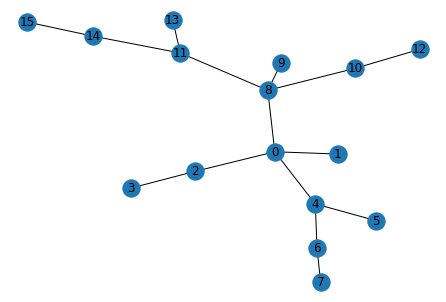

In [246]:
nx.draw(T, with_labels=True)

### 2.b case for posterior predictive density

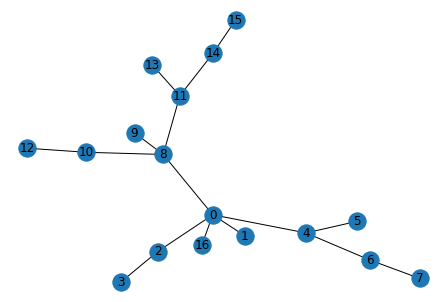

In [134]:
nx.draw(T_add, with_labels=True)

First, let us try to compute the probability of a leave $n$ given observation at all the others, for example
$$x_9 \mid x_1, ..., x_8$$
For this, we need simply need to maginalize $x_9, y_1, y_2, z_1 \mid x_1, ..., x_8$, itself given by the Gaussian condioning formula

In [135]:
# code to marginalize covariance
import pdb

def marginalize_covariance(covariance, delete_list, d):
    to_delete = []
    for i in range(len(delete_list)):
        to_delete.append([])
    for i, to_delete_idx in enumerate(delete_list):
        for k in to_delete_idx:
            to_delete[i].append(k * d) 
            to_delete[i].append(k * d + 1)
    if len(delete_list) == 1:
        x = np.delete(covariance, to_delete, 0)
        marg_covariance = np.delete(x, to_delete, 1)
    else:
        x = np.delete(covariance, to_delete[0], 0)
        marg_covariance = np.delete(x, to_delete[1], 1)
    return marg_covariance

In [287]:
[i for i in T_add.nodes() if (i not in leaves)][:-1]

[0, 2, 4, 6, 8, 10, 11, 14, 16]

In [283]:
query_node = 15

evidence = [None] * n_nodes
evidence_leaves = []
for i in range(n_nodes):
    if (i in leaves) and (i != query_node):
        rand = np.random.rand() * 1000
        evidence[i] =  np.array([rand] * d)
        evidence_leaves.append([rand] * d)
    else:
        evidence[i] =  np.array([0.0] * d)
        
#evidence_leaves = [np.array([1.0] * d)] * (n_leaves - 1)
evidence_leaves = np.array(evidence_leaves).flatten()

# Gaussian conditioning formula
to_delete_idx_ii = [i for i in T_add.nodes() if (i not in leaves)][:-1] + [query_node]
to_delete_idx_ll = [i for i in T_add.nodes() if (i in leaves) and (i != query_node)]

# partition index
I = [idx for idx in list(range(n_nodes)) if idx not in to_delete_idx_ii]
L = [idx for idx in list(range(n_nodes)) if idx not in to_delete_idx_ll]

# covariance of the observed leaves
cov_ii = marginalize_covariance(full_covariance, [to_delete_idx_ii], d)
cov_ll = marginalize_covariance(full_covariance, [to_delete_idx_ll], d)
cov_il = marginalize_covariance(full_covariance, [to_delete_idx_ii, to_delete_idx_ll], d)
cov_li = np.copy(cov_il.T)

internal_post_mean_transform = np.dot(cov_li, np.linalg.inv(cov_ii))
internal_post_covar = cov_ll - np.dot(np.dot(cov_li, np.linalg.inv(cov_ii)), cov_il)

# message passing: call from the leaf and collect the prior information

prior_node = n_nodes
tree = T_add
collect_prior_node = True
query_idx = L.index(query_node)

# perform message passing
initialize_visit(tree, prior_node)
initialize_messages(tree, d, evidence, prior_node)
perform_message_passing(tree, query_node, prior_node, collect_prior_node)

import time 
t = time.time()

print("Gaussian conditioning formula O(n^3d^3): ",
      np.dot(internal_post_mean_transform, np.hstack(evidence_leaves))[query_idx*d : query_idx*d + 2],
      internal_post_covar[query_idx*d, query_idx*d])
print("took" + str(time.time() - t) + "seconds")

print("")

t = time.time()
print("Message passing output O(nd): ", 
      tree.nodes[query_node]["mu"], tree.nodes[query_node]["nu"])
print(print("took" + str(time.time() - t) + "seconds"))

Gaussian conditioning formula O(n^3d^3):  [365.60798234 365.60798234] 2.590707964601769
took0.0005512237548828125seconds

Message passing output O(nd):  [365.60798234 365.60798234] 2.59070796460177
took0.0002541542053222656seconds
None


In [284]:
L

[0, 2, 4, 6, 8, 10, 11, 14, 15]

In [285]:
I

[1, 3, 5, 7, 9, 12, 13]

### Internal nodes

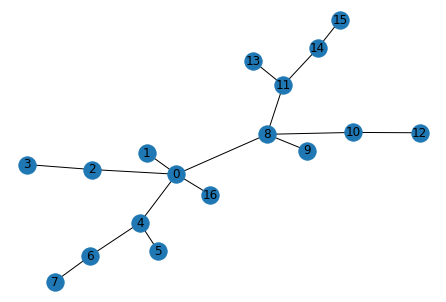

In [306]:
nx.draw(T_add, with_labels=True)

Second, let us try to compute the probability of an internal node $n$ given observation at all the leaves, for example
$$y_1 \mid x_1, ..., x_9$$
For this, we need simply need to marginalize $y_1, y_2, z_1 \mid x_1, ..., x_9$, itself given by the Gaussian conditioning formula

In [291]:
for query_node in [0, 2, 4, 6, 8, 10, 11, 14]:
    evidence = [None] * n_nodes
    evidence_leaves = []
    for i in range(n_nodes):
        if (i in leaves):
            rand_1, rand_2 = np.random.rand() *100, np.random.rand()*1000
            evidence[i] =  np.array([rand_1, rand_2])
            evidence_leaves.append([rand_1, rand_2])
        else:
            evidence[i] =  np.array([0.0] * d)

    #evidence_leaves = [np.array([1.0] * d)] * (n_leaves)
    evidence_leaves = np.array(evidence_leaves).flatten()

    # TEST
    evidence = np.array([ [0., 0.],
              [88.27739235, 823.81583794],
              [0., 0.],
              [26.88869607, 29.37755672],
              [0., 0.],
              [92.94421904, 646.59218223],
              [0., 0.],
              [59.09533284, 291.41799639],
              [0., 0.],
              [43.20778628, 78.49412141],
              [0., 0.],
              [0., 0.],
              [ 34.69196824, 860.644678  ],
              [ 61.63106644, 201.88305813],
              [0., 0.],
              [ 17.24895897, 398.2992055 ]])

    evidence_leaves = np.array([88.27739235, 823.81583794, 26.88869607, 29.37755672,
                       92.94421904, 646.59218223, 59.09533284, 291.41799639,
                       43.20778628, 78.49412141, 34.69196824, 860.644678,
                       61.63106644, 201.88305813, 17.24895897, 398.2992055])

    # Gaussian conditioning formula
    to_delete_idx_ii = [i for i in T_add.nodes() if (i not in leaves)][:-1]
    to_delete_idx_ll = [i for i in T_add.nodes() if (i in leaves)]

    # partition index
    I = [idx for idx in list(range(n_nodes)) if idx not in to_delete_idx_ii]
    L = [idx for idx in list(range(n_nodes)) if idx not in to_delete_idx_ll]

    # covariance of the observed leaves
    cov_ii = marginalize_covariance(full_covariance, [to_delete_idx_ii], d)
    cov_ll = marginalize_covariance(full_covariance, [to_delete_idx_ll], d)
    cov_il = marginalize_covariance(full_covariance, [to_delete_idx_ii, to_delete_idx_ll], d)
    cov_li = np.copy(cov_il.T)

    internal_post_mean_transform = np.dot(cov_li, np.linalg.inv(cov_ii))
    internal_post_covar = cov_ll - np.dot(np.dot(cov_li, np.linalg.inv(cov_ii)), cov_il)

    # message passing: call from the leaf and collect the prior information
    prior_node = n_nodes
    tree = T_add
    collect_prior_node = True
    query_idx = L.index(query_node)

    # perform message passing
    initialize_visit(tree, prior_node)
    initialize_messages(tree, d, evidence, prior_node)
    perform_message_passing(tree, query_node, prior_node, collect_prior_node)

    import time 
    t = time.time()

    print("Gaussian conditioning formula O(n^3d^3): ",
          np.dot(internal_post_mean_transform, np.hstack(evidence_leaves))[query_idx*d : query_idx*d + 2],
          internal_post_covar[query_idx*d, query_idx*d])
    print("took" + str(time.time() - t) + "seconds")

    t = time.time()
    print("Message passing output O(nd): ", 
          tree.nodes[query_node]["mu"], tree.nodes[query_node]["nu"])
    print(print("took" + str(time.time() - t) + "seconds"))
    
    print("")


Gaussian conditioning formula O(n^3d^3):  [ 47.47082169 363.02709641] 0.26473099914602916
took0.0003769397735595703seconds
Message passing output O(nd):  [ 47.47082169 363.02709641] 0.26473099914602904
took0.0001690387725830078seconds
None

Gaussian conditioning formula O(n^3d^3):  [ 37.17975888 196.20232657] 0.5661827497865071
took0.00033593177795410156seconds
Message passing output O(nd):  [ 37.17975888 196.20232657] 0.5661827497865073
took0.00015616416931152344seconds
None

Gaussian conditioning formula O(n^3d^3):  [ 67.98508286 462.13131074] 0.44235695986336476
took0.0003418922424316406seconds
Message passing output O(nd):  [ 67.98508286 462.13131074] 0.44235695986336465
took0.0001399517059326172seconds
None

Gaussian conditioning formula O(n^3d^3):  [ 63.54020785 376.77465356] 0.6105892399658406
took0.0003800392150878906seconds
Message passing output O(nd):  [ 63.54020785 376.77465356] 0.6105892399658411
took0.0001537799835205078seconds
None

Gaussian conditioning formula O(n^3d^3

In [271]:
to_delete_idx_ii

[0, 2, 4, 6, 8, 10, 11, 14]

In [275]:
to_delete_idx_ll

[1, 3, 5, 7, 9, 12, 13, 15]

In [282]:
for i, j in zip(cov_ii.flatten(), leaves_covariance.flatten()):
    print(i == j)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [281]:
np.all(cov_ii == leaves_covariance)

True

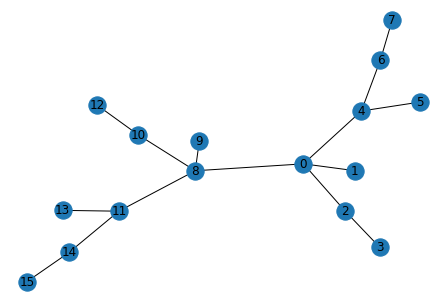

In [272]:
nx.draw(T, with_labels=True)

In [203]:
to_delete_idx_ii

[0, 2, 4, 6, 8, 10, 11, 14]

In [205]:
to_delete_idx_ll

[1, 3, 5, 7, 9, 12, 13, 15]

In [172]:
import ete3

def networkx_to_ete3(graph, root):
    subtrees = {node[0]: ete3.Tree(name=node[0]) for node in graph.nodes(data=True)}
    [*map(lambda edge: subtrees[edge[0]].add_child(subtrees[edge[1]]), graph.edges())]
    tree = subtrees[root]
    return tree

In [173]:
root = 0  #[n for n, d in T_add.in_degree() if d==0] [0]
t = networkx_to_ete3(T, root)
t

Tree node '0' (0x125b40c5)

In [174]:
print(t)


   /-1
  |
  |-- /-3
  |
  |   /-5
--|--|
  |   \- /-7
  |
  |   /-9
  |  |
   \-|-- /-12
     |
     |   /-13
      \-|
         \- /-15
